In [1]:
#reading an excel file of adult analysis data and producing/saving the following plots

In [2]:
data_path = '/home/tli_project/Desktop/Data/controls/adult_1/output/adult_T4_results_new.csv'
save_path = '/home/tli_project/Desktop/Data/controls/adult_1/output/fig1/'
viloin_plots_to_do = ['volume','density_3D', 'area', 'convexity_3D',
                        'circularity','AP_spread','DV_spread',
                        'surface_area','asymmetry']
line_plots_to_do = ['PCA_xy','PCA_shift_centroid']

In [3]:
# plotting settings
Colors = {'A':'b','B':'g','C':'orange','D':'r'}

In [4]:
from tqdm import tqdm
import os
import re
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

In [5]:
results_df = pd.read_csv(data_path, index_col=0)

In [6]:
results_df.head()

,neuron,subtype,entry_point,volume,net_area,area,AP_spread,DV_spread,density_2D,density_3D,...,yP_scale,yP_angle,yP_xy,yN_weight,yN_scale,yN_angle,yN_xy,PCA_angle,PCA_xy,PCA_shift_centroid
0,T4-02,A,[ 11 347 337],108849,14980,27964,146,267,0.535689,0.363586,...,146.971715,-99.687679,"(-0.0964996688972741, 0.5652782239136788)",0.003842,-112.013844,-279.687679,"(0.07241650660220049, -0.4242032610257114)",-9.687679,"(39.34590188342817, 6.716810136304233)","(4.393954512209415, 21.89753021929927)"
1,T4-03,D,[ 22 651 367],108692,17030,38753,159,336,0.439450,0.219961,...,91.193838,-86.747302,"(0.5951072459657829, 10.471458819771144)",0.526327,-246.534458,-266.747302,"(-7.3624309385526585, -129.54873749074792)",-266.747302,"(-7.3624309385526585, -129.54873749074792)","(-83.91317987304318, -6.3473051991717675)"
2,T4-04,B,[ 18 569 625],186473,21180,43348,167,352,0.488604,0.289973,...,146.007427,-91.955341,"(-0.28542086865273697, 8.360211519175595)",0.074719,-205.685251,-271.955341,"(0.5243854677985635, -15.35968077271772)",-181.955341,"(-104.21433415715065, -3.557917848486889)","(-16.921708624837933, -47.9081530700065)"
3,T4-05,D,[ 10 666 452],170394,22127,51284,207,367,0.431460,0.215020,...,95.363716,-81.309100,"(1.613308582059392, 10.554229281046819)",0.549541,-282.230528,-261.309100,"(-23.435768901607982, -153.31628500324416)",-261.309100,"(-23.435768901607982, -153.31628500324416)","(-97.30143836713606, -15.992372805863232)"
4,T4-06,D,[ 15 441 368],168232,20893,43249,155,367,0.483086,0.240248,...,106.038768,-80.571119,"(2.1034614700853624, 12.66635343034258)",0.467388,-259.251018,-260.571119,"(-19.850616474093734, -119.53388623792972)",-260.571119,"(-19.850616474093734, -119.53388623792972)","(-82.37215767197284, 0.870859272895592)"


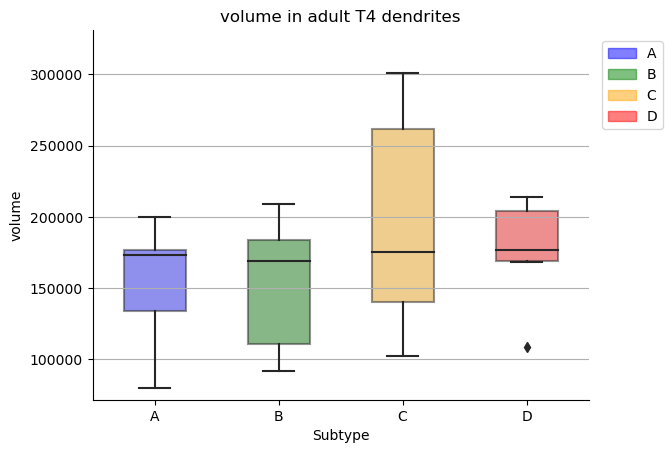

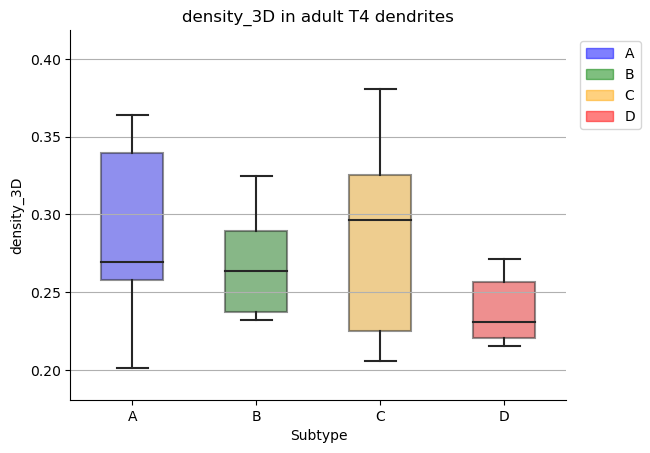

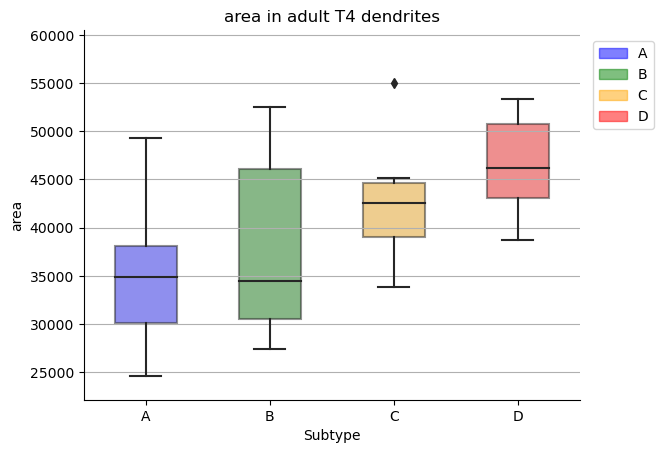

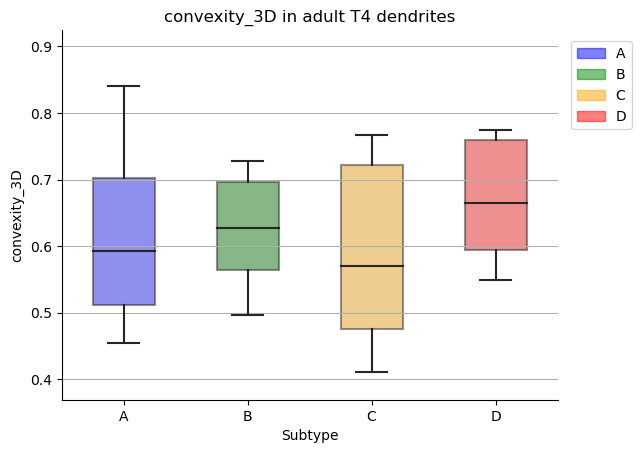

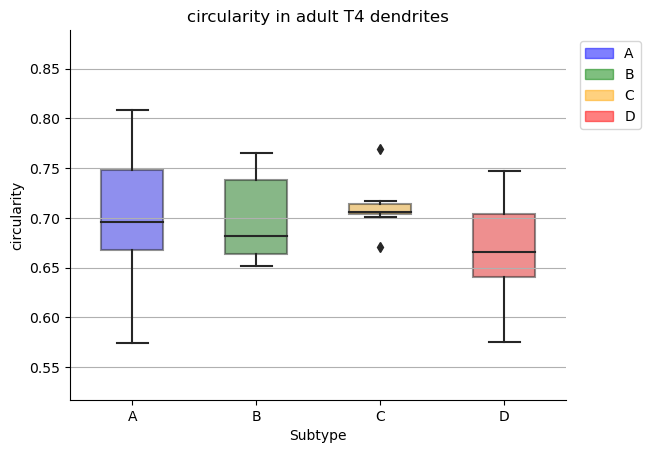

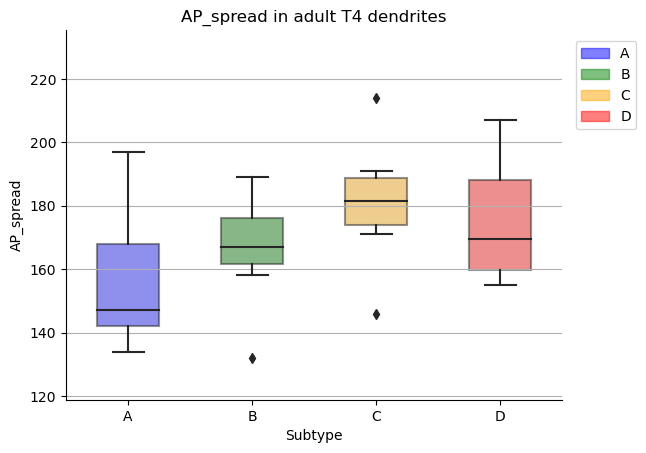

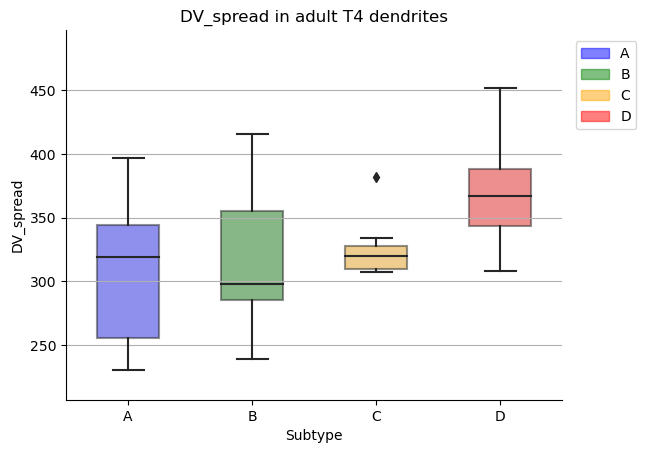

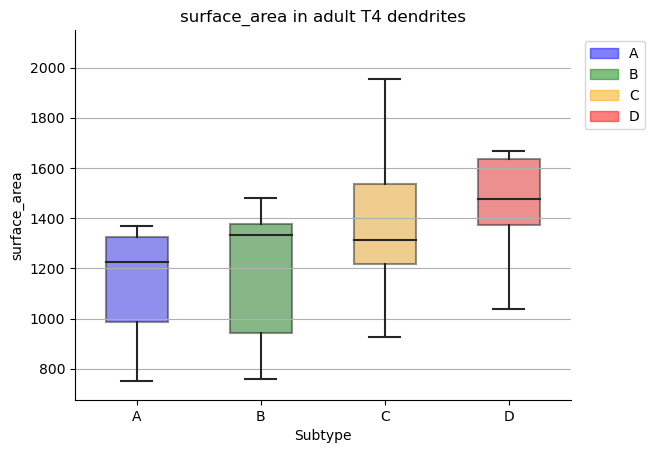

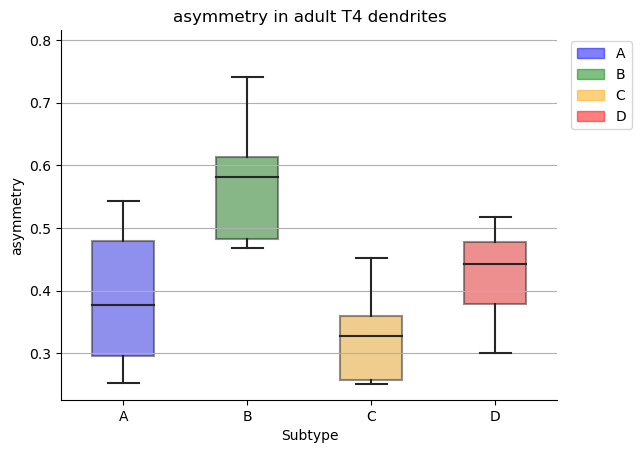

In [7]:
# for violin plot of Y_value grouped by subtype on the x_axis
# plot_col = 'convexity_3D'
for plot_col in viloin_plots_to_do:
    fig, ax = plt.subplots(1)
    my_order = ['A', 'B', 'C', 'D']
    # sns.violinplot(x='subtype', y=plot_col, data=results_df, order=my_order, palette=Colors, hue="subtype")
    sns.boxplot(x=results_df.subtype, y=results_df[plot_col], 
                order=my_order, width=0.5,
                palette=Colors, boxprops=dict(alpha=.5))
    plt.setp(ax.collections, alpha=.5)

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    ax.set_ylim(0.9*results_df[plot_col].min(),1.1*results_df[plot_col].max())
    x = np.array([0,1,2,3])
    my_xticks = ['A','B','C','D']
    plt.xticks(x, my_xticks)
    sns.despine()
    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    plot_name = plot_col+'_in_adult_T4_dendrites.pdf'
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False)

NameError: name 'x_p' is not defined

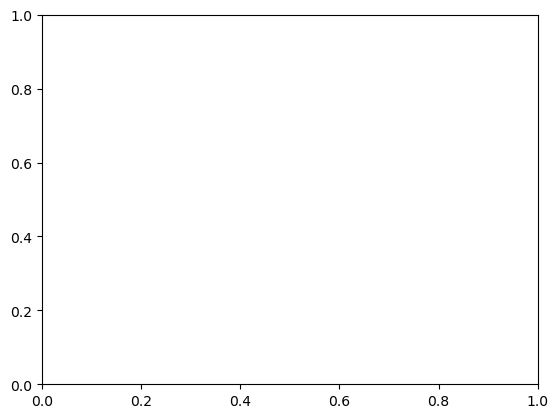

In [8]:
# for violin plot of Y_value grouped by subtype on the x_axis
# plot_col = 'convexity_3D'
for plot_col in viloin_plots_to_do:
    fig, ax = plt.subplots(1)
    # y_vals = results_df.convexity_3D
    for neu,color in Colors.items():
        subset = results_df[plot_col][results_df.subtype==neu]
        violin_parts =  ax.violinplot(subset, positions=[x_p[neu]], vert=True, widths=0.5, 
                                    showmeans=False, showextrema=True, showmedians=False, 
                                    quantiles=[0.5], bw_method=None)
        # for pc in violin_parts['bodies']:
        #     pc.set_facecolor(color)
        #     pc.set_edgecolor(color)

    ax.set_ylim(0.9*results_df[plot_col].min(),1.1*results_df[plot_col].max())

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    x = np.array([0,1,2,3])
    my_xticks = ['A','B','C','D']
    plt.xticks(x, my_xticks)
    sns.despine()

    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    plot_name = plot_col+'_in_adult_T4_dendrites.pdf'
    # plt.savefig(save_path+plot_name, facecolor='white', transparent=False)

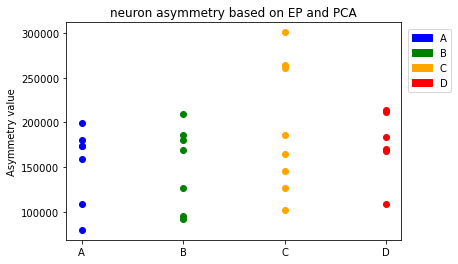

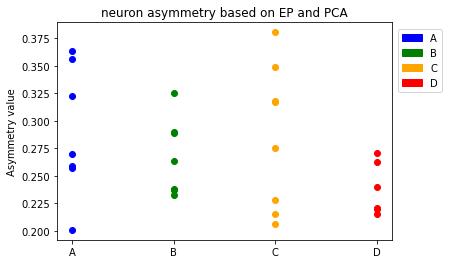

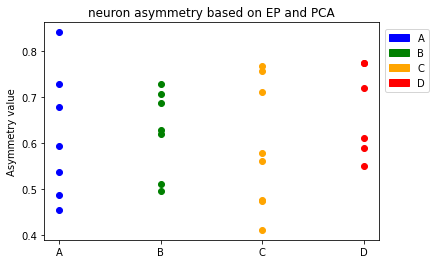

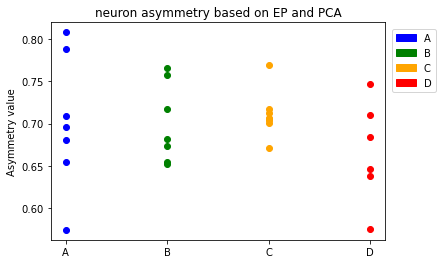

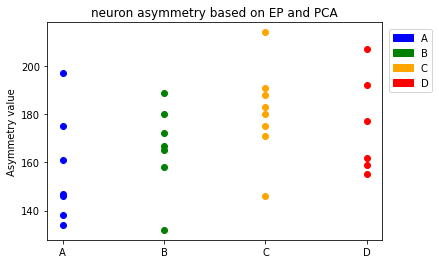

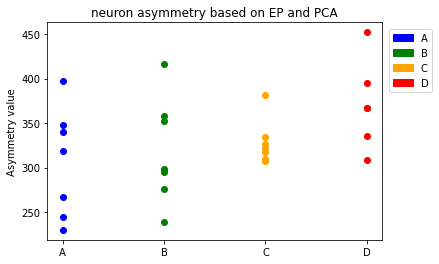

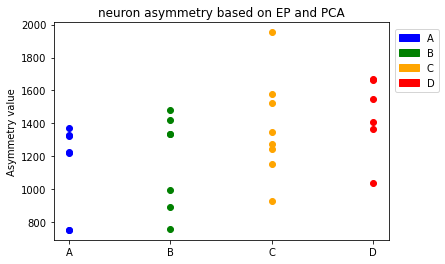

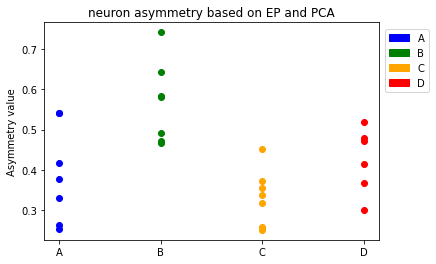

In [ ]:
# for violin plot of Y_value grouped by subtype on the x_axis
for plot_col in viloin_plots_to_do:
    fig, ax = plt.subplots(1)
    colors = {'A':'b','B':'g','C':'orange','D':'r'}
    x_p = {'A':1,'B':2,'C':3,'D':4}
    y_vals = results_df[plot_col]
    for i,neu in enumerate(y_vals):
        ax.scatter(x_p[results_df.subtype[i]],neu,c=colors[results_df.subtype[i]])
    
    ax.set_ylim(0.9*results_df[plot_col].min(),1.1*results_df[plot_col].max())

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    x = np.array([0,1,2,3])
    my_xticks = ['A','B','C','D']
    plt.xticks(x, my_xticks)
    sns.despine()

    legend_patches = []
    for subtype,color in colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    # plt.savefig(save_path+'adult_T4_Asymmetry.png', facecolor='white', transparent=False)

/tmp/ipykernel_759423/2965648711.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  col_vals = col_vals.str.replace(i,'')
/tmp/ipykernel_759423/2965648711.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  col_vals = col_vals.str.replace(i,'')


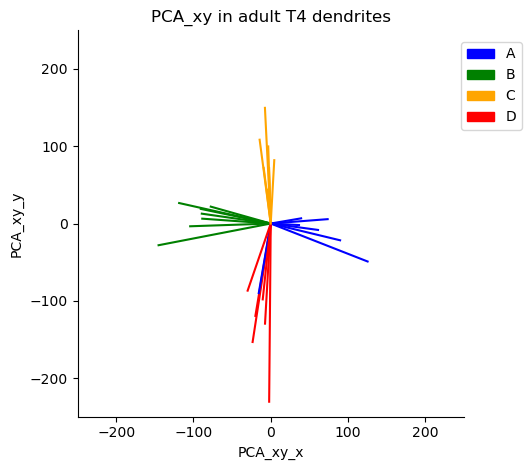

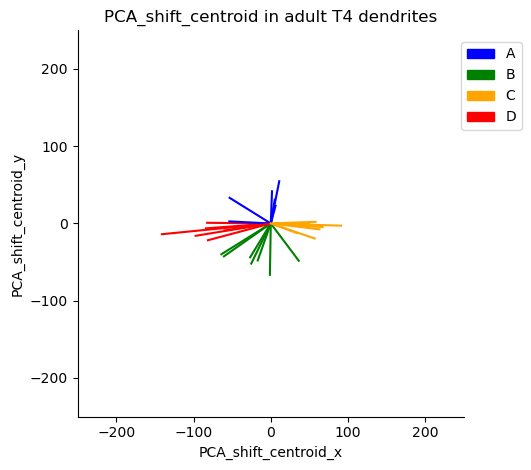

In [9]:
# To plot x,y value of one metric for individual neurons, colored by subtype
for plot_col in line_plots_to_do:
    fig, ax = plt.subplots(1)
    col_vals = results_df[plot_col]
    for i in ['(',')','[',']']:
        col_vals = col_vals.str.replace(i,'')
    col_vals = col_vals.str.split(',')
    for i, val in col_vals.items():
        col_vals[i] = [float(n) for n in val]
    for i,neu in enumerate(col_vals):
        ax.plot((0,neu[0]),(0,neu[1]),c=Colors[results_df.subtype[i]])
    
    # ax.set_ylim(1.2*y_vals.str[1].min(),1.2*y_vals.str[1].max())
    # ax.set_xlim(1.2*y_vals.str[0].min(),1.2*y_vals.str[0].max())

    ax.set_ylim(-250,250)
    ax.set_xlim(-250,250)

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.set_xlabel(plot_col+'_x')
    ax.set_ylabel(plot_col+'_y')
    sns.despine()

    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})

    ax.set_aspect('equal', 'box')
    fig.tight_layout()
    plot_name = plot_col+'_in_adult_T4_dendrites.pdf'
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False)